# COVID-19 Comparative Analysis
> A Comparison of COVID-19 wtih SARS, MERS, EBOLA and H1N1
- author: Devakumar kp
- comments: true
- permalink: /comparitive-analysis/
- toc: true
- image: images/copied_from_nb/covid-compare-1-1.png


These visualizations were made by [Devakumar kp](https://twitter.com/imdevskp), from [this kaggle kernel](https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons).

In [1]:
#hide
# ! pip install folium plotly plotnine psutil

In [2]:
#hide
! npm install -g electron@6.1.4 orca

npm WARN deprecated request@2.88.2: request has been deprecated, see https://github.com/request/request/issues/3142


npm WARN deprecated mkdirp@0.5.4: Legacy versions of mkdirp are no longer supported. Please update to mkdirp 1.x. (Note that the API surface has changed to use Promises in 1.x.)


npm WARN deprecated left-pad@1.3.0: use String.prototype.padStart()


/opt/hostedtoolcache/node/10.19.0/x64/bin/electron -> /opt/hostedtoolcache/node/10.19.0/x64/lib/node_modules/electron/cli.js
/opt/hostedtoolcache/node/10.19.0/x64/bin/orca -> /opt/hostedtoolcache/node/10.19.0/x64/lib/node_modules/orca/bin/orca.js

> electron@6.1.4 postinstall /opt/hostedtoolcache/node/10.19.0/x64/lib/node_modules/electron
> node install.js



+ orca@1.3.1
+ electron@6.1.4
updated 2 packages in 7.133s


In [3]:
#hide
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from plotnine import *
import plotly.express as px
import folium

from IPython.display import Javascript
from IPython.core.display import display, HTML

# color pallette
cdr = ['#393e46', '#ff2e63', '#30e3ca'] # grey - red - blue
idr = ['#f8b400', '#ff2e63', '#30e3ca'] # yellow - red - blue

s = '#f0134d'
h = '#12cad6'
e = '#4a47a3'
m = '#42e6a4'
c = '#333333'

shemc = [s, h, e, m, c]
sec = [s, e, c]

In [4]:
#hide
# COVID-19
# --------

# covid_19 dataset
covid_19 = pd.read_csv('https://raw.githubusercontent.com/imdevskp/covid_19_jhu_data_web_scrap_and_cleaning/master/new/complete_data.csv', 
                       parse_dates=['Date'])

# selecting important columns only
covid_19 = covid_19[['Date', 'Country/Region', 'Confirmed', 'Deaths']]

# replacing Mainland china with just China
covid_19['Country/Region'] = covid_19['Country/Region'].replace('Mainland China', 'China')

# renaming columns
covid_19.columns = ['Date', 'Country', 'Cases', 'Deaths']

# group by date and country
covid_19 = covid_19.groupby(['Date', 'Country'])['Cases', 'Deaths']
covid_19 = covid_19.sum().reset_index()

# latest
c_lat = covid_19[covid_19['Date'] == max(covid_19['Date'])].reset_index()

# latest grouped by country
c_lat_grp = c_lat.groupby('Country')['Cases', 'Deaths'].sum().reset_index()

# nth day
covid_19['nth_day'] = (covid_19['Date'] - min(covid_19['Date'])).dt.days

# day by day
c_dbd = covid_19.groupby('Date')['Cases', 'Deaths'].sum().reset_index()

# nth day
c_dbd['nth_day'] = covid_19.groupby('Date')['nth_day'].max().values

# no. of countries
temp = covid_19[covid_19['Cases']>0]
c_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

c_dbd['new_cases'] = c_dbd['Cases'].diff()
c_dbd['new_deaths'] = c_dbd['Deaths'].diff()
c_dbd['epidemic'] = 'COVID-19'

covid_19.head()

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Country,Cases,Deaths,nth_day
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [5]:
#hide
# EBOLA
# ------

# ebola dataset
ebola_14 = pd.read_csv("https://raw.githubusercontent.com/imdevskp/ebola_outbreak_dataset/master/ebola_2014_2016_clean.csv", 
                       parse_dates=['Date'])

# ebola_14 = ebola_14[ebola_14['Date']!=max(ebola_14['Date'])]

# selecting important columns only
ebola_14 = ebola_14[['Date', 'Country', 'No. of confirmed, probable and suspected cases',
                     'No. of confirmed, probable and suspected deaths']]

# renaming columns
ebola_14.columns = ['Date', 'Country', 'Cases', 'Deaths']
ebola_14.head()

# group by date and country
ebola_14 = ebola_14.groupby(['Date', 'Country'])['Cases', 'Deaths']
ebola_14 = ebola_14.sum().reset_index()

# filling missing values
ebola_14['Cases'] = ebola_14['Cases'].fillna(0)
ebola_14['Deaths'] = ebola_14['Deaths'].fillna(0)

# converting datatypes
ebola_14['Cases'] = ebola_14['Cases'].astype('int')
ebola_14['Deaths'] = ebola_14['Deaths'].astype('int')

# latest
e_lat = ebola_14[ebola_14['Date'] == max(ebola_14['Date'])].reset_index()

# latest grouped by country
e_lat_grp = e_lat.groupby('Country')['Cases', 'Deaths'].sum().reset_index()

# nth day
ebola_14['nth_day'] = (ebola_14['Date'] - min(ebola_14['Date'])).dt.days

# day by day
e_dbd = ebola_14.groupby('Date')['Cases', 'Deaths'].sum().reset_index()

# nth day
e_dbd['nth_day'] = ebola_14.groupby('Date')['nth_day'].max().values

# no. of countries
temp = ebola_14[ebola_14['Cases']>0]
e_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values

e_dbd['new_cases'] = e_dbd['Cases'].diff()
e_dbd['new_deaths'] = e_dbd['Deaths'].diff()
e_dbd['epidemic'] = 'EBOLA'

ebola_14.head()

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:35: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:41: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Country,Cases,Deaths,nth_day
0,2014-08-29,Guinea,648,430,0
1,2014-08-29,Liberia,1378,694,0
2,2014-08-29,Nigeria,19,7,0
3,2014-08-29,Sierra Leone,1026,422,0
4,2014-09-05,Guinea,812,517,7


In [6]:
#hide
# SARS
# ----

# sars dataset
sars_03 = pd.read_csv("https://raw.githubusercontent.com/imdevskp/sars-2003-outbreak-data-with-web-scrapping-munging-and-cleaning-code/master/sars_2003_complete_dataset_clean.csv", 
                       parse_dates=['Date'])

# selecting important columns only
sars_03 = sars_03[['Date', 'Country', 'Cumulative number of case(s)', 
                   'Number of deaths', 'Number recovered']]

# renaming columns
sars_03.columns = ['Date', 'Country', 'Cases', 'Deaths', 'Recovered']

# group by date and country
sars_03 = sars_03.groupby(['Date', 'Country'])['Cases', 'Deaths', 'Recovered']
sars_03 = sars_03.sum().reset_index()

# latest
s_lat = sars_03[sars_03['Date'] == max(sars_03['Date'])].reset_index()

# latest grouped by country
s_lat_grp = s_lat.groupby('Country')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
sars_03['nth_day'] = (sars_03['Date'] - min(sars_03['Date'])).dt.days

# day by day
s_dbd = sars_03.groupby('Date')['Cases', 'Deaths', 'Recovered'].sum().reset_index()

# nth day
s_dbd['nth_day'] = sars_03.groupby('Date')['nth_day'].max().values

# no. of countries
temp = sars_03[sars_03['Cases']>0]
s_dbd['n_countries'] = temp.groupby('Date')['Country'].apply(len).values


s_dbd['new_cases'] = s_dbd['Cases'].diff()
s_dbd['new_deaths'] = s_dbd['Deaths'].diff()
s_dbd['epidemic'] = 'SARS'

s_dbd.head()

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:24: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/opt/hostedtoolcache/Python/3.6.10/x64/lib/python3.6/site-packages/ipykernel_launcher.py:30: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Date,Cases,Deaths,Recovered,nth_day,n_countries,new_cases,new_deaths,epidemic
0,2003-03-17,167,4,0,0,7,NaN,NaN,SARS
1,2003-03-18,219,4,0,1,9,52.0,0.0,SARS
2,2003-03-19,264,9,0,2,11,45.0,5.0,SARS
3,2003-03-20,306,10,0,3,12,42.0,1.0,SARS
4,2003-03-21,350,10,0,4,14,44.0,0.0,SARS


In [7]:
#hide
# MERS
mers_cntry = pd.read_csv("https://raw.githubusercontent.com/imdevskp/mers_dataset_collection_cleaning/master/country_count_latest.csv")
mers_weekly = pd.read_csv("https://raw.githubusercontent.com/imdevskp/mers_dataset_collection_cleaning/master/weekly_clean.csv")

# cleaning
mers_weekly['Year-Week'] = mers_weekly['Year'].astype(str) + ' - ' + mers_weekly['Week'].astype(str)
mers_weekly['Date'] = pd.to_datetime(mers_weekly['Week'].astype(str) + 
                                     mers_weekly['Year'].astype(str).add('-1'),format='%V%G-%u')

mers_weekly.head()

,Year,Week,Region,New Cases,Year-Week,Date
0,2012,12,Other Countries,1,2012 - 12,2012-03-19
1,2012,12,Republic of Korea,0,2012 - 12,2012-03-19
2,2012,12,Saudi Arabia,0,2012 - 12,2012-03-19
3,2012,13,Other Countries,0,2012 - 13,2012-03-26
4,2012,13,Republic of Korea,0,2012 - 13,2012-03-26


In [8]:
#hide
mers_cntry.head()

,Country,Confirmed
0,Algeria,2
1,Austria,2
2,Bahrain,1
3,China,1
4,Egypt,1


In [9]:
#hide
mers_weekly.head()

,Year,Week,Region,New Cases,Year-Week,Date
0,2012,12,Other Countries,1,2012 - 12,2012-03-19
1,2012,12,Republic of Korea,0,2012 - 12,2012-03-19
2,2012,12,Saudi Arabia,0,2012 - 12,2012-03-19
3,2012,13,Other Countries,0,2012 - 13,2012-03-26
4,2012,13,Republic of Korea,0,2012 - 13,2012-03-26


# Reported Countries

In [10]:
#hide
fig = px.choropleth(c_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Emrld", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.write_image('covid-compare-1-1.png')

#-----------------------------------------------------------------------------------------

fig = px.choropleth(e_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Emrld", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.write_image('covid-compare-1-2.png')

#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp, locations="Country", locationmode='country names',
                    color="Cases", hover_name="Country", 
                    color_continuous_scale="Emrld", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
fig.write_image('covid-compare-1-3.png')

#-----------------------------------------------------------------------------------------

fig = px.choropleth(mers_cntry, locations="Country", locationmode='country names',
                    color="Confirmed", hover_name="Country", 
                    color_continuous_scale='Emrld', title='MERS')
fig.update(layout_coloraxis_showscale=False)
fig.write_image('covid-compare-1-4.png')

![](covid-compare-1-1.png)
![](covid-compare-1-2.png)
![](covid-compare-1-3.png)
![](covid-compare-1-4.png)

# Deaths

In [11]:
#hide
fig = px.choropleth(c_lat_grp[c_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='COVID-19')
fig.update(layout_coloraxis_showscale=False)
fig.write_image('covid-compare-2-1.png')

#-----------------------------------------------------------------------------------------

fig = px.choropleth(e_lat_grp[e_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='EBOLA 2014')
fig.update(layout_coloraxis_showscale=False)
fig.write_image('covid-compare-2-2.png')


#-----------------------------------------------------------------------------------------

fig = px.choropleth(s_lat_grp[s_lat_grp['Deaths']>0], locations="Country", locationmode='country names',
                    color="Deaths", hover_name="Country", 
                    color_continuous_scale="Sunsetdark", title='SARS 2003')
fig.update(layout_coloraxis_showscale=False)
# fig.write_image('covid-compare-2-3.png')
fig.write_image('covid-compare-2-3.png')

![](covid-compare-2-1.png)
![](covid-compare-2-2.png)
![](covid-compare-2-3.png)

# Proportion

In [12]:
#hide
fig = px.treemap(c_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='COVID-19',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.write_image('covid-compare-3-1.png')

fig = px.treemap(e_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='EBOLA',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.write_image('covid-compare-3-2.png')

fig = px.treemap(s_lat_grp.sort_values(by='Cases', ascending=False).reset_index(drop=True), 
                 path=["Country"], values="Cases", title='SARS',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.write_image('covid-compare-3-3.png')

fig = px.treemap(mers_cntry, 
                 path=["Country"], values="Confirmed", title='MERS',
                 color_discrete_sequence = px.colors.qualitative.Dark2)
fig.write_image('covid-compare-3-4.png')

![](covid-compare-3-1.png)
![](covid-compare-3-2.png)
![](covid-compare-3-3.png)
![](covid-compare-3-4.png)

# Comparison

In [13]:
#hide
# sum of cases
# -----------

c_cases = sum(c_lat_grp['Cases'])
c_deaths = sum(c_lat_grp['Deaths'])
c_no_countries = len(c_lat_grp['Country'].value_counts())

s_cases = sum(s_lat_grp['Cases'])
s_deaths = sum(s_lat_grp['Deaths'])
s_no_countries = len(s_lat_grp['Country'].value_counts())

e_cases = sum(e_lat_grp['Cases'])
e_deaths = sum(e_lat_grp['Deaths'])
e_no_countries = len(e_lat_grp['Country'].value_counts())

In [14]:
#hide
epidemics = pd.DataFrame({
    'epidemic' : ['COVID-19', 'SARS', 'EBOLA', 'MERS', 'H1N1'],
    'start_year' : [2019, 2003, 2014, 2012, 2009],
    'end_year' : [2020, 2004, 2016, 2017, 2010],
    'confirmed' : [c_cases, s_cases, e_cases, 2494, 6724149],
    'deaths' : [c_deaths, s_deaths, e_deaths, 858, 19654],
    'no_of_countries' : [c_no_countries, s_no_countries, e_no_countries, 27, 178]
})

epidemics['mortality'] = round((epidemics['deaths']/epidemics['confirmed'])*100, 2)
epidemics = epidemics.sort_values('end_year').reset_index(drop=True)
epidemics.head()

,epidemic,start_year,end_year,confirmed,deaths,no_of_countries,mortality
0,SARS,2003,2004,8432,813,31,9.64
1,H1N1,2009,2010,6724149,19654,178,0.29
2,EBOLA,2014,2016,28642,11319,10,39.52
3,MERS,2012,2017,2494,858,27,34.40
4,COVID-19,2019,2020,418678,18625,170,4.45


In [15]:
#hide
fig = px.bar(epidemics.sort_values('confirmed',ascending=False), 
             x="confirmed", y="epidemic", color='epidemic', 
             text='confirmed', orientation='h', title='No. of Cases', 
             range_x=[0,7500000],
             color_discrete_sequence = [h, c, e, s, m])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.write_image('covid-compare-4-1.png')

In [16]:
#hide
fig = px.bar(epidemics.sort_values('deaths',ascending=False), 
             x="deaths", y="epidemic", color='epidemic', 
             text='deaths', orientation='h', title='No. of Deaths',
             range_x=[0,25000],
             color_discrete_sequence = [h, e, c, m, s])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.write_image('covid-compare-4-2.png')

In [17]:
#hide
fig = px.bar(epidemics.sort_values('mortality',ascending=False),
             x="mortality", y="epidemic", color='epidemic', 
             text='mortality', orientation='h', title='Mortality rate', 
             range_x=[0,100],
             color_discrete_sequence = [e, m, s, c, h])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.write_image('covid-compare-4-3.png')

In [18]:
#hide
fig = px.bar(epidemics.sort_values('no_of_countries', ascending=False),
             x="no_of_countries", y="epidemic", color='epidemic', 
             text='no_of_countries', orientation='h', title='No. of Countries', 
             range_x=[0,200],
             color_discrete_sequence = [h, c, s, m, e])
fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.write_image('covid-compare-4-4.png')

In [19]:
#hide
temp = pd.concat([s_dbd, e_dbd, c_dbd], axis=0, sort=True)
                
fig = px.line(temp, x="Date", y="Cases", color='epidemic', 
             title='No. of new cases',
             color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.write_image('covid-compare-4-5.png')

fig = px.line(temp, x="Date", y="Deaths", color='epidemic', 
             title='No. of new deaths',
             color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.write_image('covid-compare-4-6.png')

![](covid-compare-4-1.png)
![](covid-compare-4-2.png)
![](covid-compare-4-3.png)
![](covid-compare-4-4.png)
![](covid-compare-4-5.png)
![](covid-compare-4-6.png)

# In the first N days

In [20]:
#hide
fig = px.line(temp, x="nth_day", y="Cases", color='epidemic', 
             title='Cases', color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.write_image('covid-compare-5-1.png')

fig = px.line(temp, x="nth_day", y="Deaths", color='epidemic', 
             title='Deaths', color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.write_image('covid-compare-5-2.png')

fig = px.line(temp, x="nth_day", y="n_countries", color='epidemic', 
             title='No. of Countries', color_discrete_sequence = sec)
fig.update_layout(xaxis_rangeslider_visible=True)
fig.write_image('covid-compare-5-3.png')

In [21]:
#hide
fig = px.scatter(epidemics, x='start_year', y = [1 for i in range(len(epidemics))], 
                 size=epidemics['confirmed']**0.3, color='epidemic', title='Confirmed Cases',
                 color_discrete_sequence = shemc, hover_name='epidemic', height=400,
                 text=epidemics['epidemic']+'<br> Cases : '+epidemics['confirmed'].apply(str))
fig.update_traces(textposition='bottom center')
fig.update_yaxes(showticklabels=False)
fig.update_layout(showlegend=False)
fig.write_image('covid-compare-5-4.png')

fig = px.scatter(epidemics, x='start_year', y = [1 for i in range(len(epidemics))], 
                 size=epidemics['deaths']**0.5, color='epidemic', title='Deaths',
                 color_discrete_sequence = shemc, hover_name='epidemic', height=400,
                 text=epidemics['epidemic']+'<br> Deaths : '+epidemics['deaths'].apply(str))
fig.update_traces(textposition='bottom center')
fig.update_yaxes(showticklabels=False)
fig.update_layout(showlegend=False)
fig.write_image('covid-compare-5-5.png')

![](covid-compare-5-1.png)
![](covid-compare-5-2.png)
![](covid-compare-5-3.png)
![](covid-compare-5-4.png)
![](covid-compare-5-5.png)

In [22]:
#hide
c_lat_grp.head()

,Country,Cases,Deaths
0,Afghanistan,74,1
1,Albania,123,5
2,Algeria,264,19
3,Andorra,164,1
4,Angola,3,0


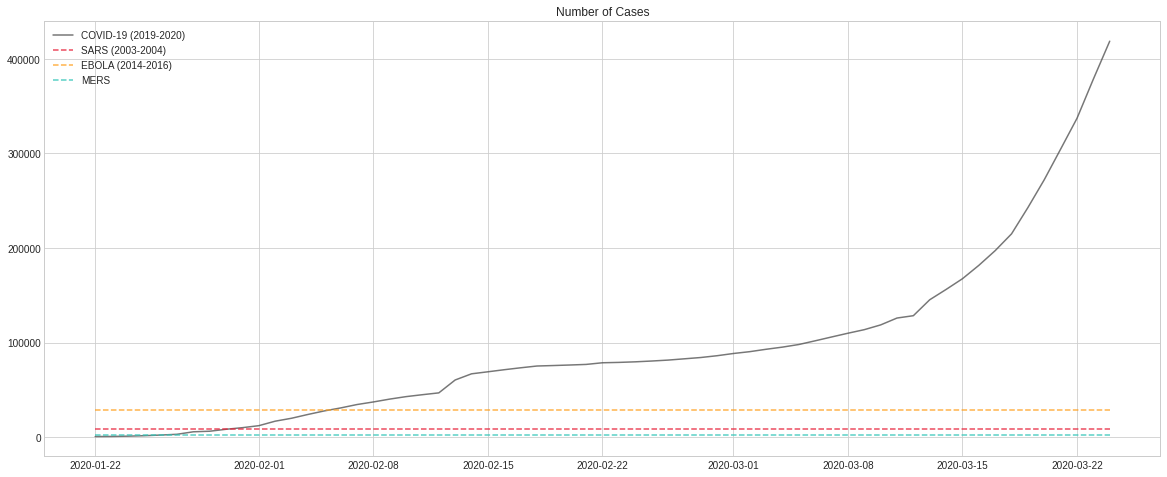

In [23]:
#hide_input
temp = covid_19.groupby('Date')['Cases'].sum().reset_index()

covid = temp['Cases']
sars = [8096 for i in range(len(temp))]
ebola = [28646 for i in range(len(temp))]
mers = [2494 for i in range(len(temp))]
h1n1 = [6724149 for i in range(len(temp))]

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(20, 8))
ax = plt.plot(temp['Date'], covid, label='COVID-19 (2019-2020)', c='#555555', alpha=0.8)
ax = plt.plot(temp['Date'], sars, label='SARS (2003-2004)', c='#E71D36', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], ebola, label='EBOLA (2014-2016)', c='#FF9F1C', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], mers, label='MERS', c='#2EC4B6', ls='--', alpha=0.8)
plt.title('Number of Cases')
plt.legend()
plt.show()

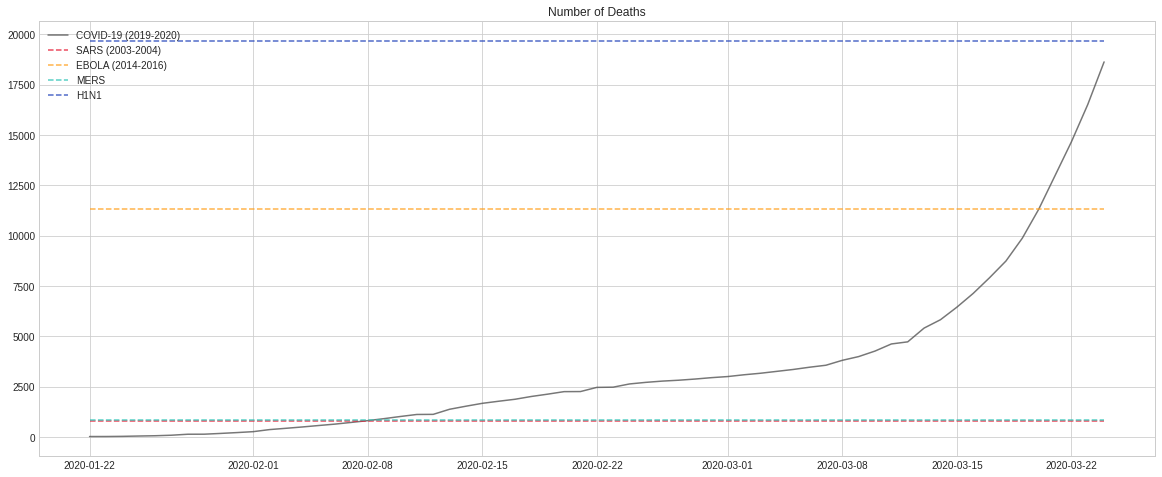

In [24]:
#hide_input
temp = covid_19.groupby('Date')['Deaths'].sum().reset_index()

covid = temp['Deaths']
sars = [774 for i in range(len(temp))]
ebola = [11323 for i in range(len(temp))]
mers = [858 for i in range(len(temp))]
h1n1 = [19654 for i in range(len(temp))]

plt.figure(figsize=(20, 8))
ax = plt.plot(temp['Date'], covid, label='COVID-19 (2019-2020)', c='#555555', alpha=0.8)
ax = plt.plot(temp['Date'], sars, label='SARS (2003-2004)', c='#E71D36', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], ebola, label='EBOLA (2014-2016)', c='#FF9F1C', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], mers, label='MERS', c='#2EC4B6', ls='--', alpha=0.8)
ax = plt.plot(temp['Date'], h1n1, label='H1N1', c='#2345BA', ls='--', alpha=0.8)
plt.title('Number of Deaths')
plt.legend()
plt.show()

# Related Work

1. [https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons](https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons)  
2. [https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis](https://www.kaggle.com/imdevskp/western-africa-ebola-outbreak-analysis)  
3. [https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis](https://www.kaggle.com/imdevskp/sars-2003-outbreak-analysis)